In [1]:
import pandas as pd
import glob, os
import numpy as np

In [174]:
climate_data = pd.read_csv("날씨데이터 이상치대체x 스케일링x.csv",encoding="utf-8").set_index("date")

In [38]:
climate_data.index = pd.to_datetime(climate_data.index,format="%Y-%m-%d")
climate_data_scaled.index = pd.to_datetime(climate_data_scaled.index,format="%Y-%m-%d")

In [ ]:

​
import seaborn as sns

In [4]:
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib.pyplot as plt

## 계절 군집화

In [179]:
# 큰 값들에 의해서 휘둘리지 않도록 표준화 진행해주기
numerical_column = climate_data.describe().columns
numerical_climate_data = climate_data.loc[:,numerical_column]
#numerical_climate_data = numerical_climate_data.fillna(0)

In [180]:
numerical_climate_data

,평균기온,최저기온,최고기온,rain,최대풍속,평균풍속,평균상대습도,평균이슬점온도,평균현지기압,평균증기압,...,O3,NO2,PM10,PM25,최고자외선지수,실효습도,weekrain,threerain,tenrain,기온편차
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-0.218947,-4.775789,5.246316,0.000000,5.072632,1.965263,51.204211,-10.228421,1013.687368,2.987368,...,0.017962,0.022471,44.247625,21.767793,2.475,49.723017,2.289585,1.483366,16.889215,2.822791
2018-01-02,0.332979,-5.213830,6.002128,0.000000,4.976596,1.882979,57.358511,-8.069149,1014.413830,3.586170,...,0.015340,0.027985,55.835057,31.722031,2.225,49.796267,2.001013,0.644304,16.889215,2.909657
2018-01-03,-1.412766,-5.039362,2.993684,1.900000,4.924211,2.457895,47.917021,-11.859574,1015.734043,2.640426,...,0.019536,0.019848,33.682890,18.207946,3.150,45.398041,3.401013,1.900000,4.472193,3.196444
2018-01-04,-1.576842,-5.478947,2.349474,1.916667,4.007368,1.729474,53.737895,-10.341053,1012.675789,2.931579,...,0.014723,0.026739,41.252011,23.891078,2.750,43.957973,5.317680,3.816667,6.106251,3.150767
2018-01-05,0.020000,-3.314737,4.707368,1.160000,5.228421,2.125263,56.424211,-8.381053,1006.648421,3.413684,...,0.014802,0.030309,49.815903,32.736032,2.225,44.846453,6.460033,4.976667,6.977680,2.993703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.706316,-3.020000,5.086316,0.535714,5.775789,2.593684,54.984211,-7.953684,1011.371579,3.458947,...,0.024543,0.019490,29.360052,17.753350,2.600,53.260628,7.403276,2.578517,11.624488,2.640431
2019-12-28,0.622105,-4.743158,7.457895,0.500000,3.007368,1.096842,62.104211,-6.440000,1015.929474,3.873684,...,0.014188,0.027858,40.368701,22.723994,2.700,52.174800,7.481054,2.911851,9.269942,2.699771
2019-12-29,2.853684,-2.257895,6.888421,7.406667,3.485263,1.340000,75.749474,-1.418947,1013.283158,5.834737,...,0.011655,0.027710,44.484182,28.261511,1.800,55.630849,12.562720,8.442381,15.601609,3.145101


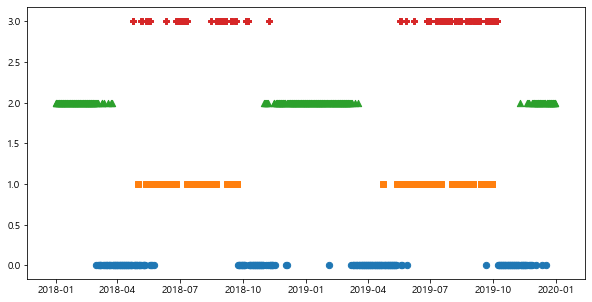

In [93]:
what_date_cluster(numerical_climate_data,4)

####월별 날씨 데이터에 대한 K -Means 클러스터링
- 앞선 클러스터링은 일별 클러스터링이다보니 같은 월안에서 여러개의 클러스터링이 존재한다
- 배달 수요 예측 논문의 경우 우리나라는 3 ~ 5월이 봄 이런 식으로 정해버림
- 이거 대신 구체적인 K - Means 클러스터링을 이용해 월별 클러스터링을 진행해보자
- numerical_climate_data : 연속형 변수만 모아놓은 것
- numerical_climate_data_month : 월별로 연속형 변수 groupby 한 것

In [186]:
X = numerical_climate_data.copy()
X.index = pd.to_datetime(X.index ,format="%Y-%m-%d")
# datetime 객체로 변경해주기
X["일시"] = X.index
X["월"] = X["일시"].apply(lambda x : x.month)

In [187]:
X = X.reset_index(drop=True)
aggregation = {i:"mean" for i in X.columns[:-3]}
numerical_climate_data_month = X.groupby("월").agg(aggregation)

엘보우 기법 위한 그래프 그리기

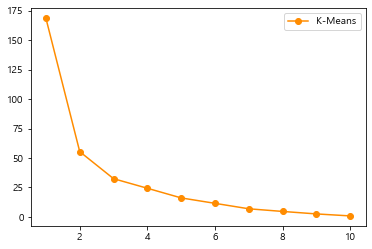

In [103]:
SSE = []
for i in range(1,11):
    kmeans = KMeans(max_iter=500,init="k-means++",n_clusters=i,random_state=0)
    kmeans.fit(numerical_climate_data_month.values)
    SSE.append(np.round(kmeans.inertia_,3))

plt.plot(range(1,11),SSE,marker="o",label="K-Means",color="darkorange")
plt.legend(loc="upper right")
plt.show()

3 개의 군집을 가지는 경우 평균 silhouette 점수는 0.4546065037761844
4 개의 군집을 가지는 경우 평균 silhouette 점수는 0.4296423882640859
5 개의 군집을 가지는 경우 평균 silhouette 점수는 0.43068172636489616


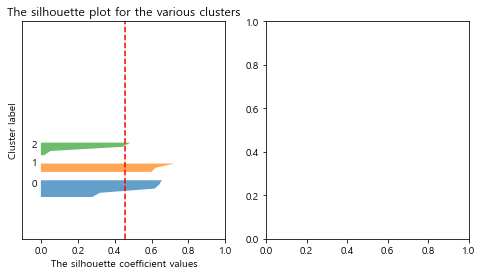

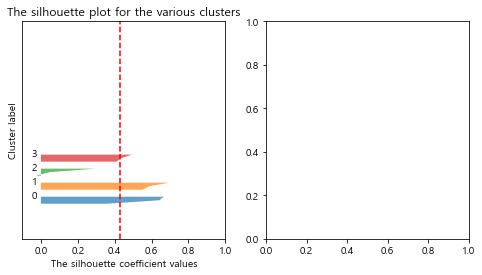

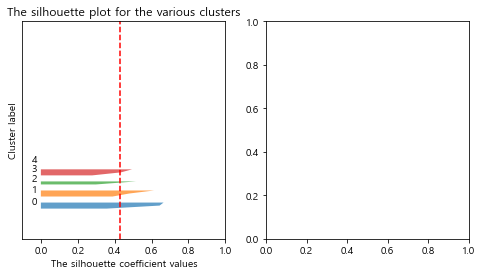

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_samples, silhouette_score
colors = ["red","blue","darkorange","green"]
for i in [3,4,5]:
    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    X = numerical_climate_data_month.values
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=500,random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(i+1)*10])
    silhouette_avg = silhouette_score(X,cluster_labels)
    silhouette_samples_values = silhouette_samples(X,cluster_labels)
    print("{0} 개의 군집을 가지는 경우 평균 silhouette 점수는 {1}".format(i,silhouette_avg))
    
    #pca_df = pd.DataFrame(pca_data,columns=["pca1","pca2"])
    #pca_df["labels"] = cluster_labels
    # 시각화를 위해 라벨 데이터를 붙여주기
    y_lower = 10
    
    for j in range(i):
        ith_silhouette_values = silhouette_samples_values[cluster_labels == j]
        ith_silhouette_values.sort()
        # i 번째 군집에 해당하는 sample들을 가져온다. 2번째 
        y_upper = y_lower + len(ith_silhouette_values)        
        #color = cm.nipy_spectral(float(i) / j)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_silhouette_values,alpha=0.7)
        ax1.text(-0.05,y_lower+ 0.5 * len(ith_silhouette_values),str(j))
        y_lower = y_upper + 1
        
        #data = pca_df[pca_df["labels"] == j]
        #ax2.scatter(x=data.iloc[:,0],y=data.iloc[:,1],marker=".",s=40)
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_yticks([])
        

In [146]:
labels

array([0, 0, 3, 3, 2, 2, 1, 1, 1, 2, 3, 0])

0.4296423882640859

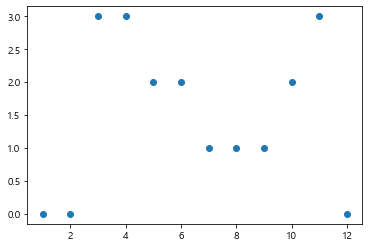

In [188]:
kmeans = KMeans(n_clusters=4,init="k-means++",max_iter=500,random_state=0)
labels = kmeans.fit_predict(numerical_climate_data_month.values)
plt.scatter(numerical_climate_data_month.index,labels)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(numerical_climate_data_month.values,labels)
silhouette_avg

계절 군집별로 특징 파악하기 위한 시각화 그래프

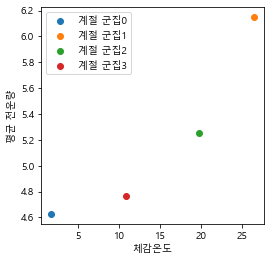

In [198]:
centers = kmeans.cluster_centers_
weather = [""]
fig,ax = plt.subplots(1,1,figsize=(4,4))
for i in range(4):
    df = pd.DataFrame(data = centers[i].reshape(1,-1),columns = numerical_climate_data_month.columns)
    ax.scatter(x=df.loc[:,"체감온도"],y = df.loc[:,"평균.전운량.1.10."],label="계절 군집" + str(i))
    ax.legend()
    ax.set_xlabel("체감온도")
    ax.set_ylabel("평균 전운량")

- 월별로 4개의 그룹으로 나누게 되면 겨울 / 봄,가을 / 초여름, 늦여름 / 여름 이렇게 나뉨

In [106]:
numerical_climate_data_month

,평균기온,최저기온,최고기온,rain,최대풍속,평균풍속,평균상대습도,평균이슬점온도,평균현지기압,평균증기압,...,SO2,CO,O3,NO2,PM10,최고자외선지수,실효습도,weekrain,threerain,tenrain
월,,,,,,,,,,,,,,,,,,,,,
1,-1.458009,-1.389367,-1.481906,-0.357956,0.305988,0.312641,-0.874995,-1.401678,0.964666,-1.092958,...,1.083000,1.264209,-0.894320,0.931534,0.670427,-1.174477,-1.036868,-0.648017,-0.496061,-0.722931
2,-1.258016,-1.245748,-1.251081,-0.291818,0.385264,0.350396,-1.061643,-1.307124,0.822878,-1.052474,...,0.923415,0.869068,-0.358594,0.674912,0.616598,-0.815848,-1.309180,-0.575636,-0.431404,-0.649869
3,-0.577106,-0.641107,-0.514620,-0.175956,0.634994,0.515298,-0.331948,-0.565533,0.242173,-0.705065,...,0.329827,0.379990,0.454489,0.378668,0.704846,-0.276325,-0.367688,-0.246819,-0.197638,-0.270768
4,-0.081031,-0.178536,-0.018957,-0.056305,0.466414,0.365183,-0.392480,-0.216487,-0.153440,-0.428858,...,0.073337,-0.324363,0.718736,0.025159,0.360963,0.307101,-0.519379,-0.160432,-0.102063,-0.250337
5,0.493164,0.360502,0.566156,-0.093337,0.271059,0.224728,-0.251080,0.291738,-0.588011,0.048054,...,0.316563,-0.382748,1.425684,-0.229505,0.250998,0.709005,-0.276442,-0.136839,-0.103198,-0.117972
6,0.859389,0.847251,0.857591,0.110201,-0.308764,-0.305786,0.390183,0.805337,-1.114649,0.677103,...,0.101094,-0.608584,1.123911,-0.516134,-0.294238,0.835210,0.380559,-0.087383,0.092508,-0.173755
7,1.282123,1.351344,1.180748,0.320803,-0.415571,-0.175281,0.841292,1.282827,-1.104765,1.540084,...,-0.308687,-0.879403,-0.007335,-0.912617,-0.674953,1.188762,1.044740,0.780717,0.462938,0.922581
8,1.381439,1.424243,1.316364,0.466198,-0.292731,-0.199700,0.742298,1.339896,-1.124262,1.654815,...,-0.522722,-0.666838,0.136304,-0.943357,-0.725918,1.150111,0.856191,0.637230,0.602513,0.612547
9,0.805848,0.866900,0.731411,0.360955,-0.410225,-0.360916,0.838624,0.890330,-0.260383,0.837507,...,-0.895388,-0.673575,-0.125637,-0.728493,-0.819358,0.351170,1.020515,0.879795,0.532421,1.113066
